# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Top 3 Metaverse Crypto Coins Gaining The Most Price Today (TVK, ERN, JGN).  With cryptocurrency markets trading sideways today, several Metaverse crypto coins are showing significant price gains. Let&#8217;s look at the top three Metaverse crypto coins gaining the most price today, ordered by 24-hour price growth, lowest to highest. #3 Terra Virtual Kolect (TVK) +9% Launched in December 2020, Terra Virtua Kolect (TVK) is a Metaverse NFT [&#8230;]The post Top 3 Metaverse Crypto Coins Gaining The Most Price Today (TVK, ERN, JGN) appeared first on NullTX. ... [| Skaityti daugiau](https://nulltx.com/top-3-metaverse-crypto-coins-gaining-the-most-price-today-tvk-ern-jgn/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- With the world the way it is at the moment, we need to stop saving things for tomorrow and seize the day.  When Ukrainian international Andriy Yarmolenko scored for West Ham I realised the significance of that moment – the fact we are living through Covid, and a war – and was overcome with emotion ... [| Skaityti daugiau](http://www.independent.co.uk/voices/existential-questions-relationships-covid-ukraine-b2037179.html) 

### Kainų kaita pandemijos metu

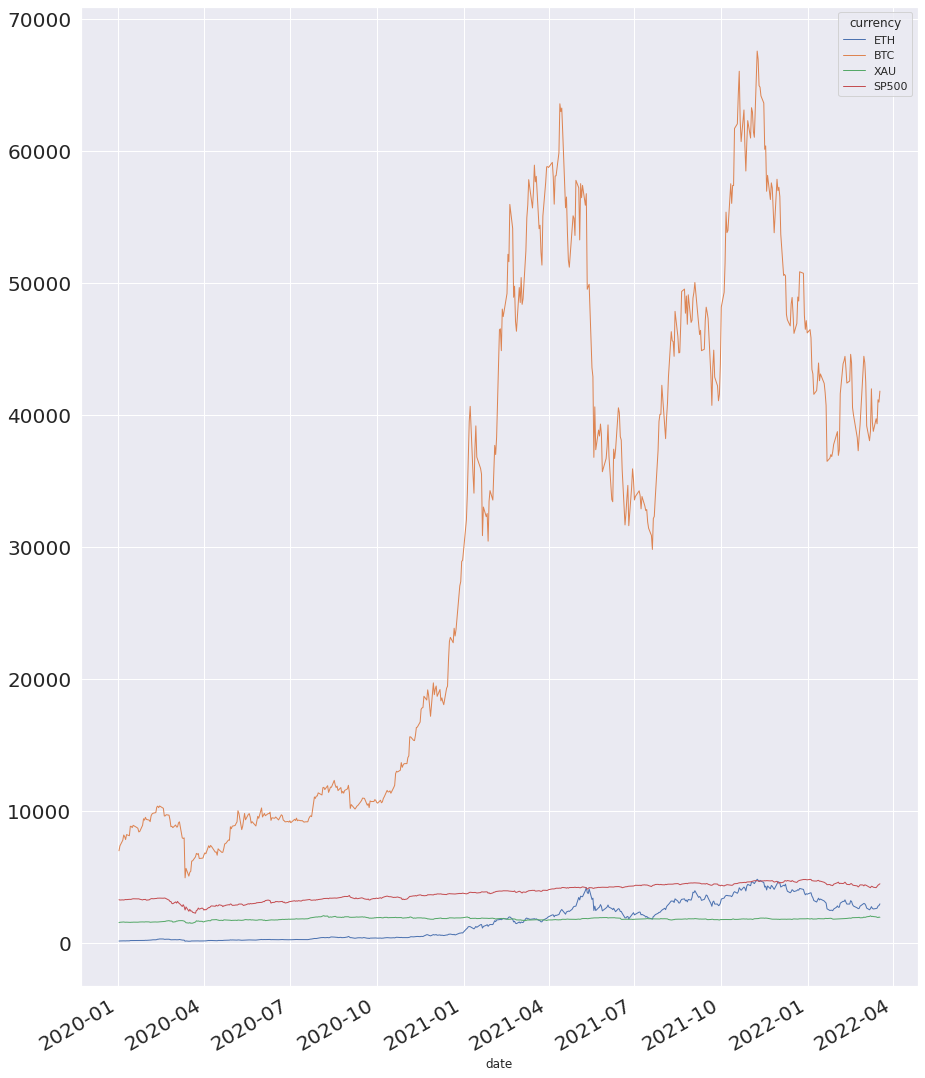

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.904053,0.194615,0.920732
BTC,0.904053,1.000000,0.164758,0.872319
XAU,0.194615,0.164758,1.000000,0.333577
SP500,0.920732,0.872319,0.333577,1.000000


In [8]:
#hide ### Koreliacijos matrica.

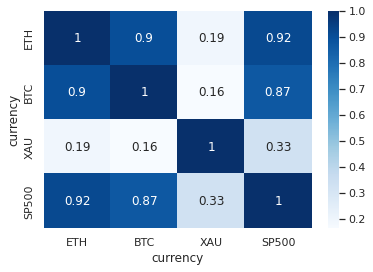

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')